# Decision Tree를 이용한 와인 데이터 분석

- 분류 문제에서 많이 사용하는 Iris 꽃 데이터만큼 알려지진 않았지만, 와인데이터도 많이 사용한다.

## 🔰 Wine dataset

In [1]:
import pandas as pd

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [2]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### --▶ __컬럼의 종류__

<img src="https://github.com/ElaYJ/Study_Machine_Learning/assets/153154981/7cecaf64-b2e2-4b35-8763-593343b84611" width="70%" height="70%">

In [4]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### --▶ __두 데이터 합치기__

- 합치기 전에 레드 와인인지 화이트 와인인지 구분하기 위한 라벨을 추가해 준다.

- 구조가 동일하므로 `pd.concat()`을 사용한다.

In [5]:
red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## 🔰 와인 종류 분류기(DTClassifier)

- 레드 와인인지 화이트 와인인지 구분하는 분류기

#### --▶ __라벨 분할__

- 먼저 학습 데이터와 정답 데이터를 만들어 준다.

- 레드와인과 화인트와인을 구별하는 것이 목적이므로 'color'가 정답 데이터가 된다.

- 'color'를 라벨로 분리해 준다.

In [11]:
X = wine.drop(['color'], axis=1) #--> column drop
y = wine['color']

#### --▶ __훈련용/테스트용 데이터로 분리__

- 데이터를 8:2 비율로 훈련용과 테스트용으로 나눠준다.

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3913, 1284], dtype=int64))

#### --▶ __분리 정도 확인__

- 훈련용과 테스트용 데이터가 레드/화이트 와인에 따라 어느 정도 구분되어 있는지 확인한다.

In [13]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train['quality'], name='Train'))
fig.add_trace(go.Histogram(x=X_test['quality'], name='Test'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

### ⏺ Decision Tree 훈련

In [14]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train) #<--(features, labels)

DecisionTreeClassifier(max_depth=2, random_state=13)

#### └▶ 학습 결과

- 정답 데이터(y_train, y_test)와 학습한 모델에 의해 예측된 데이터(y_pred_tr, y_pred_test)를 비교해서</br>
	정확도 값을 구한다.

In [15]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc:', accuracy_score(y_train, y_pred_tr)) #--> 훈련용 데이터의 정확도
print('Test Acc:', accuracy_score(y_test, y_pred_test)) #--> 테스트용 데이터의 정확도

Train Acc: 0.9553588608812776
Test Acc: 0.9569230769230769


<br></br>

---

</br>

# 데이터 전처리(Preproceccing)

- MinMaxScaler와 StandardScaler

- 지금까지 학습한 Decision Tree는 Scaler에 의한 전처리에 크게 영향을 받지 않는다.

	그 이유는 DT에 영향을 주는 엔트로피나 지니계수 계산 과정에서 데이터 Feature의 편향이 영향을 주지 않기 때문이다.

- 그러나 전처리를 적용한 데이터를 가지고 다시 Decision Tree 모델을 생성해 본다.

## 🔰 데이터 전처리 과정

#### --▶ BoxPlot 시각화

- 와인 데이터의 몇 개 항목을 BoxPlot으로 그려서 특성을 비교해 보자.

In [17]:
fig = go.Figure()
fig.update_layout(width=1000, height=800)
fig.add_trace(go.Box(y=X['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name='quality'))

fig.show()

#### 🚩 __전처리의 필요성__

<img src="https://github.com/ElaYJ/Study_Machine_Learning/assets/153154981/834996ff-9a70-484c-a058-b97c7302a8a0" width="70%" height="70%">

👉 BoxPlot 컬럼 == Feature

- 컬럼들의 최대/최소 범위가 각각 다르고, 평균과 분산이 각각 다르다.

- 특성(feature)의 편향 문제는 최적의 모델을 찾는데 방해가 될 수도 있다.

</br>

컬럼 즉, Feature(특성들) 간의 범위 격차가 심하게 큰 경우 제대로 학습이 안 될 수도 있다. 안 된다는 것은 아니다.!!

반드시 학습이 제데로 이루어지지 않는다고는 말할 수는 없지만, 그럴 가능성이 존재한다.

위와 같은 분포에서 Scaler를 사용하면 효과적일 수도 있다. 그러나 Decision Tree 에서는 효과가 없다.

그러면 MinMaxScaler가 좋을까? StandardScaler가 좋을까? 그것은 적용해 봐야 알 수 있다.


#### --▶ __MinMax/Standard Scaler 전처리__

- 결정트리에서 이런 전처리는 의미를 가지지 않는다.

- 주로 Cost Function을 최적화할 때 유효할 수 있다.

- MinMaxScaler와 StandardScaler 중 어떤 것이 좋을지는 해봐야 안다.

In [21]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

MMS.fit(X)
SS.fit(X)

X_mms = MMS.transform(X)
X_ss = SS.transform(X)
#--> X_mms, X_ss는 numpy의 MatrixLike Array

In [19]:

X_mms_df = pd.DataFrame(X_mms, columns=X.columns)
X_ss_df = pd.DataFrame(X_ss, columns=X.columns)

In [22]:
X_mms_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333


In [23]:
X_ss_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230


#### --▶ MinMaxScaler 처리결과 시각화

- MinMaxScaler 처리는 최대 최소값을 강제로 1과 0으로 맞추는 것이다.

In [29]:
def px_box(target_df):
    fig = go.Figure()
    fig.update_layout(width=1000, height=800)
    fig.add_trace(go.Box(y=target_df['fixed acidity'], name='fixed acidity'))
    fig.add_trace(go.Box(y=target_df['chlorides'], name='chlorides'))
    fig.add_trace(go.Box(y=target_df['quality'], name='quality'))
    fig.show()

In [30]:
px_box(X_mms_df)

#### --▶ StandardScaler 처리결과 시각화

- StandardScaler($X\thicksim N(0,1)$) 처리는 평균을 0으로 표준편차를 1로 맞추는 것이다.

In [31]:
px_box(X_ss_df)

## 🔰 와인 종류 분류기(DTClassifier)

- 레드 와인인지 화이트 와인인지 구분하는 분류기를 전처리한 데이터를 가지고 다시 한 번 만들어 본다.

- 다시 이야기하지만 결정나무에서는 이런 전처리는 거의 효과가 없다.

- 전처리 전 DT 모델의 정확도

	$\boxed{\text{Train Acc :}~0.9553588608812776} \\ \boxed{\text{ Test~~Acc :}~0.9569230769230769}$

#### --▶ MinMaxScaler를 적용해 다시 학습

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_df, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train) #--> (features, labels)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc:', accuracy_score(y_train, y_pred_tr))
print('Test Acc:', accuracy_score(y_test, y_pred_test))

Train Acc: 0.9553588608812776
Test Acc: 0.9569230769230769


#### --▶ StandardScaler를 적용해 다시 학습

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_df, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train) #--> (features, labels)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc:', accuracy_score(y_train, y_pred_tr))
print('Test Acc:', accuracy_score(y_test, y_pred_test))

Train Acc: 0.9553588608812776
Test Acc: 0.9569230769230769


#### --▶ DT 모델 구조 확인

- 전처리가 DT 모델에 아무런 영향을 주지는 못했지만,

- 아무튼, 결정나무는 화이트와인과 레드와인을 어떻게 구분할까?

- 뭔지 몰라도 total sulfur dioxide가 중요한 역할을 하나보다.

	(total sulfur dioxide → 총 이산화황~ TSO2)

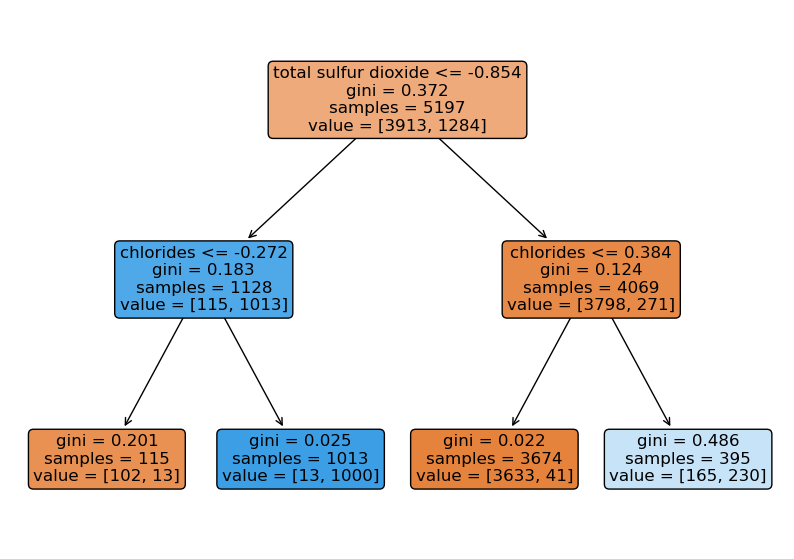

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(wine_tree, feature_names=X.columns.tolist(), fontsize=12, filled=True, rounded=True);

#### --▶ Features의 중요도 확인

- 레드와인과 화이트와인을 구분하는 중요한 특성은 무엇일까?

- 확인해 본 결과 'total sulfur dioxide'가 76% 정도의 중요도로 가장 높았다.

In [40]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}